In [21]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd
from itertools import combinations
from functions import *

In [22]:
def calcAcc(D1):
    
    D1['number_of_letters'] = D1['correctSequence'].apply(lambda x: len(x))
    # D1[D1['number_of_letters']==3]
    accuracies = []
    for idx,row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'], row['userInput']).size / len(row['correctSequence']))
    D1['accuracies'] = np.array(accuracies)

In [23]:
names = [
    'Carl',
         'Erik',
         'Ali',
         'Kasper'
           ]

df = pd.DataFrame()
for name in names:
    df2 = loadDataFrame(name+'/'+'\eksperiment3.csv')
    df = pd.concat((df,df2),ignore_index=True)
calcAcc(df)

df

,wait,correctSequence,userInput,number_of_letters,accuracies
0,1,"[R, Z, C]","[R, Z, C]",3,1.000000
1,1,"[R, E, G]","[R, E, G]",3,1.000000
2,1,"[M, H, S]","[M, H, S]",3,1.000000
3,1,"[S, P, L, H]","[S, P, L, H]",4,1.000000
4,1,"[Z, J, F, V]","[Z, J, F, V]",4,1.000000
...,...,...,...,...,...
156,1,"[E, B, U, T, S, M, U, I, U]","[E, B, U, T, S, M, U, I, U]",9,0.777778
157,1,"[A, S, W, S, Z, P, A, H, Y]","[A, S, W, S, Z, P, A, W, S]",9,0.555556
158,1,"[Z, T, U, C, X, Q, Y, L, Q]","[Z, T, U, X, Q, L, Y, P, C]",9,0.888889
159,1,"[C, R, T, A, H, Z, N, X, G]","[C, R, T, A, S, C, S, X, G]",9,0.666667


In [24]:

model = smf.ols('accuracies ~ number_of_letters', data=df).fit()
display(model.summary())
model.f_pvalue

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             accuracies   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     86.26
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           1.14e-16
Time:                        21:11:53   Log-Likelihood:                 127.58
No. Observations:                 161   AIC:                            -251.2
Df Residuals:                     159   BIC:                            -245.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1152      0.026     42.353      0.000       1.063       1.167
number_of_letters    -0.0364      0.004     -9.288      0.000      -0.044      -0.029
==============================================================================
Omnibus:                       26.699   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.448
Skew:                          -1.014   Prob(JB):                     3.31e-08
Kurtosis:                       4.011   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

np.float64(1.1421539508581293e-16)

In [25]:
dfMeans = df.groupby('number_of_letters')[['accuracies']].mean()
dfMeans

,accuracies
number_of_letters,
3,0.984127
4,0.964286
5,0.952381
6,0.920635
7,0.857143
8,0.833333
9,0.777778
10,0.735714


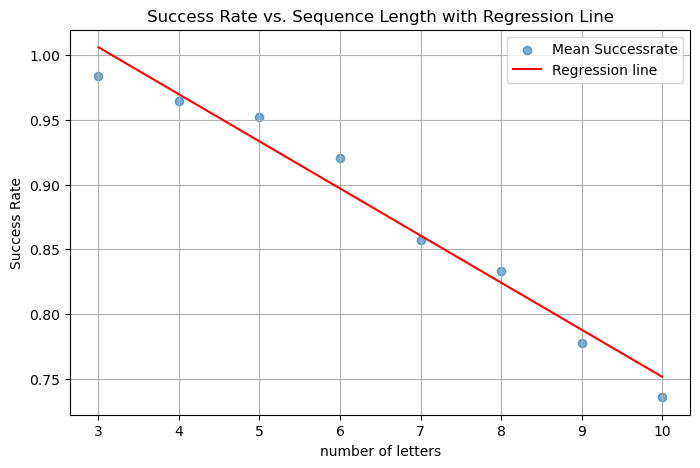

In [26]:

x_vals = np.linspace(df['number_of_letters'].min(), df['number_of_letters'].max(), 50)
y_vals = model.predict(pd.DataFrame({'number_of_letters': x_vals}))# Plot with regression line
plt.figure(figsize=(8, 5))

plt.scatter(dfMeans.index, dfMeans['accuracies'], alpha=0.6, label='Mean Successrate')
plt.plot(x_vals, y_vals, color='red', label='Regression line')
plt.xlabel("number of letters")
plt.ylabel("Success Rate")
plt.title("Success Rate vs. Sequence Length with Regression Line")
plt.legend()
plt.grid(True)
plt.show()